In [16]:
pip install osmnx >> log.txt

DEPRECATION: Loading egg at /opt/homebrew/Cellar/gpgme/1.22.0/lib/python3.11/site-packages/gpg-1.22.0-py3.11-macosx-12-arm64.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install matplotlib >> log.txt

DEPRECATION: Loading egg at /opt/homebrew/Cellar/gpgme/1.22.0/lib/python3.11/site-packages/gpg-1.22.0-py3.11-macosx-12-arm64.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
Note: you may need to restart the kernel to use updated packages.


In [18]:
pip install optalgotools >> log.txt

DEPRECATION: Loading egg at /opt/homebrew/Cellar/gpgme/1.22.0/lib/python3.11/site-packages/gpg-1.22.0-py3.11-macosx-12-arm64.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
Note: you may need to restart the kernel to use updated packages.


In [19]:
pip install folium >> log.txt

DEPRECATION: Loading egg at /opt/homebrew/Cellar/gpgme/1.22.0/lib/python3.11/site-packages/gpg-1.22.0-py3.11-macosx-12-arm64.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
Note: you may need to restart the kernel to use updated packages.


In [20]:
pip install tqdm >> log.txt

DEPRECATION: Loading egg at /opt/homebrew/Cellar/gpgme/1.22.0/lib/python3.11/site-packages/gpg-1.22.0-py3.11-macosx-12-arm64.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
Note: you may need to restart the kernel to use updated packages.


In [21]:
import osmnx as ox
import matplotlib.pyplot as plt


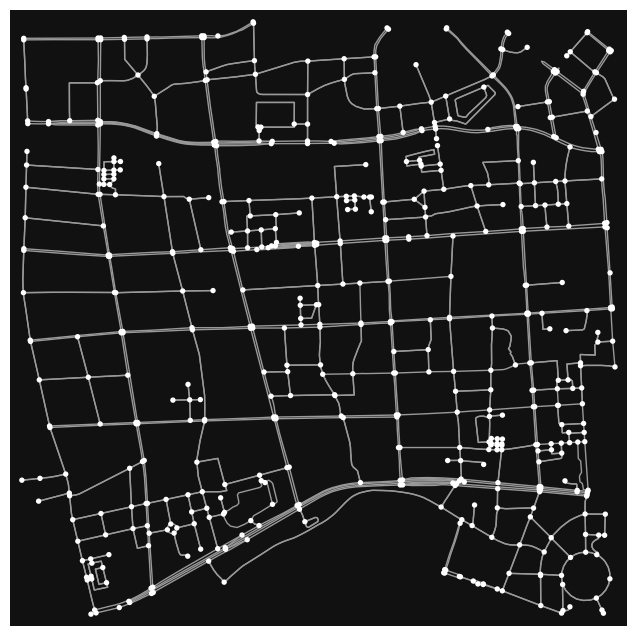

In [22]:
place_name = "Gudang, Hangzhou, China"
GuDang = (30.284698, 120.109238)

# fetch OSM street network (drive, walk, private, etc.) from the location
# graph = ox.graph_from_address(place_name, network_type='drive', dist=3100)
graph = ox.graph_from_point(GuDang, network_type='drive', dist=2100)

fig, ax = ox.plot_graph(graph)

In [23]:
nodes, edges = ox.graph_to_gdfs(graph)

# Filter nodes that have the 'highway' attribute set to 'traffic_signals'
traffic_lights = nodes[nodes['highway'] == 'traffic_signals']
# print(traffic_lights)
# 30.275918, 120.100727
# 30.276076, 120.110777
# 30.281993, 120.109132
# 30.281756, 120.099814
# 30.286588, 120.098738
# 30.294818, 120.097855
# 30.294894, 120.097944
30.295046, 120.097944
30.300075, 120.097855


x, y =30.289251, 120.092349 



# print(traffic_lights.filter(['y', 'x']==['30.281835', '120.109041']))
target_node = traffic_lights[(abs(traffic_lights['x'] - y) < 0.01) & (abs(traffic_lights['y'] - x) < 0.01)]
# osmid_of_target_node = target_node['id'].values[0]
target_node
# print(traffic_lights['geometry'])


y           x          highway  street_count  \
osmid                                                             
27127995   30.288749  120.093942  traffic_signals             4   
27128014   30.288670  120.093956  traffic_signals             4   
271682804  30.284142  120.100000  traffic_signals             4   
271682869  30.283906  120.094924  traffic_signals             4   
271683593  30.284006  120.100037  traffic_signals             4   
271683606  30.283821  120.094933  traffic_signals             4   
277256407  30.288858  120.098593  traffic_signals             4   
277256419  30.288960  120.098569  traffic_signals             4   
332556590  30.283816  120.094807  traffic_signals             4   
332556593  30.283895  120.094802  traffic_signals             4   
332556596  30.288668  120.093863  traffic_signals             4   
332556598  30.288751  120.093849  traffic_signals             4   

                             geometry  
osmid                                  
27127995   POINT (120.09394 30.28875)  
27128014   POINT (120.09396 30.28867)  
271682804  POINT (120.10000 30.28414)  
271682869  POINT (120.09492 30.28391)  
271683593  POINT (120.10004 30.28401)  
271683606  POINT (120.09493 30.28382)  
277256407  POINT (120.09859 30.28886)  
277256419  POINT (120.09857 30.28896)  
332556590  POINT (120.09481 30.28382)  
332556593  POINT (120.09480 30.28390)  
332556596  POINT (120.09386 30.28867)  
332556598  POINT (120.09385 30.28875)

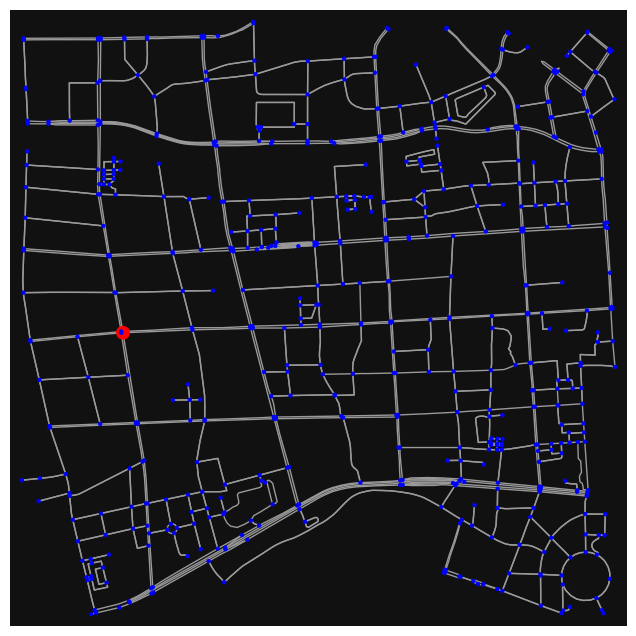

In [30]:
# Suppose the node IDs of the two nodes you want to highlight are 1234567890 and 9876543210
# node1_id = 26197709 # 30.284443	120.114585         2, 3
# node1_id = 3382408994 # 30.278606	120.115016      1,3
# node1_id = 26496837 # 30.278366	120.106039     1,2
# node1_id = 26607405  # 30.284117	120.10446     2,2
# node1_id =  332556593 # 30.283895	120.094802   2,1
# node1_id = 332556598 # 30.288751	120.093849   3,1
# node1_id =  33720424 # 30.289040	120.102869      3,2
# node1_id = 262910008  # 30.289688	120.114313      3,3
node1_id = 271683606
# for node1_id in target_node:
    # print(node1_id)
    # Create a list of node colors: default color for most nodes and a special color for the highlighted nodes
nc = ['r' if node == node1_id else 'b' for node in graph.nodes()]

# Create a list of node sizes: larger size for the highlighted nodes and default size for the rest
ns = [100 if node == node1_id else 10 for node in graph.nodes()]

# Plot the graph with the specified node colors and sizes
fig, ax = ox.plot_graph(graph, node_color=nc, node_size=ns)

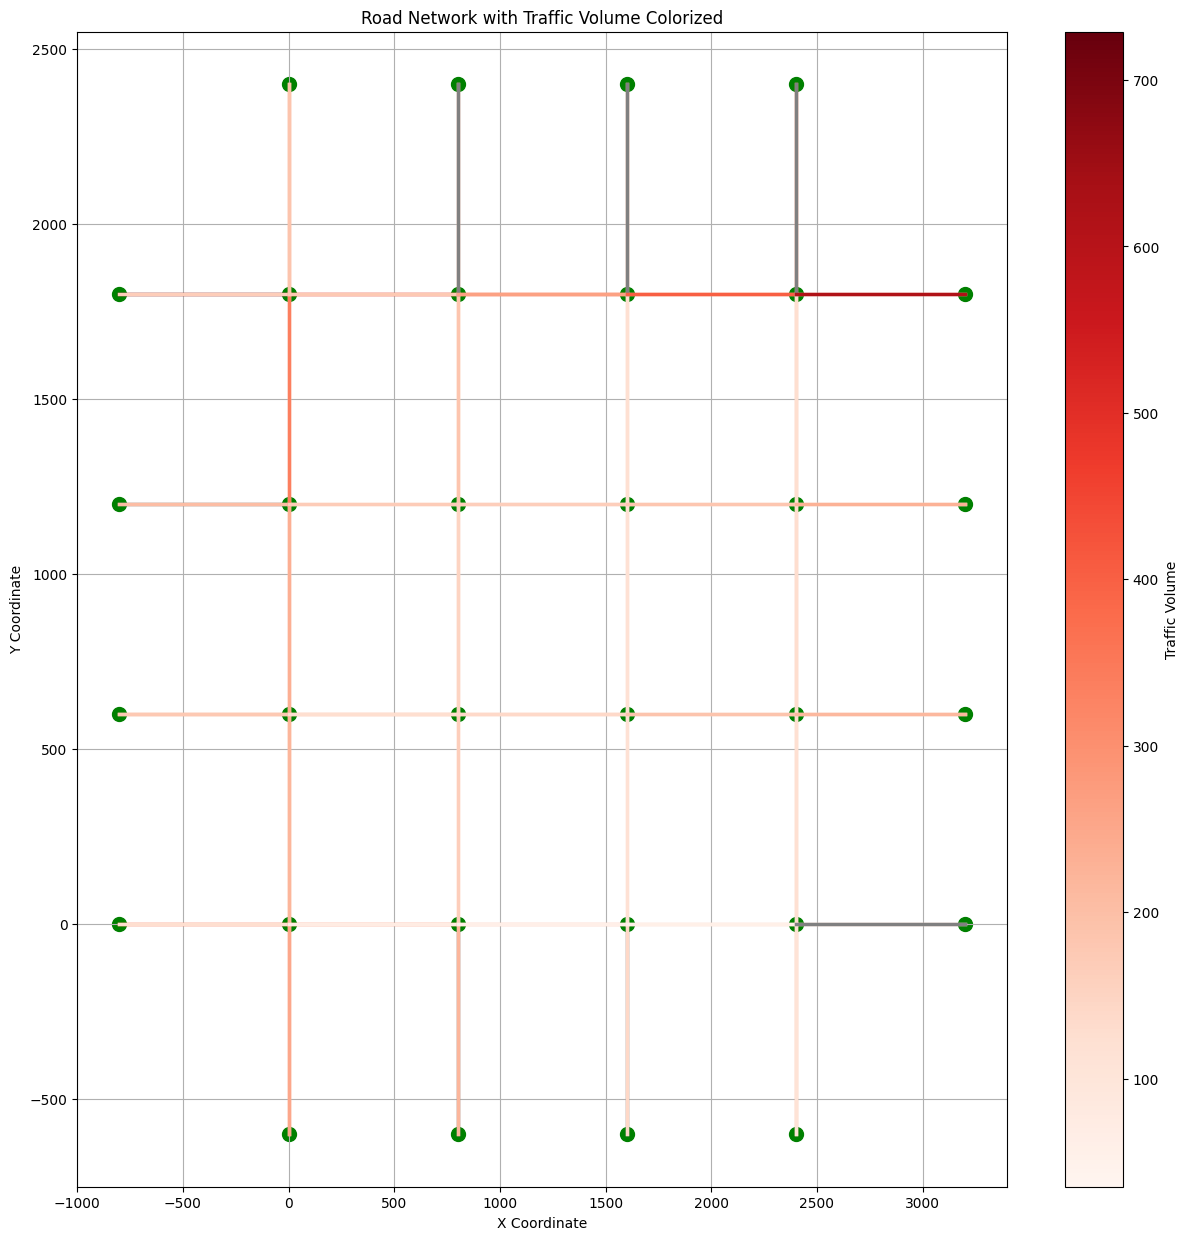

In [25]:
import json
import matplotlib.pyplot as plt
import argparse


with open("./hangzhou_4x4_gudang_18041610_1h/roadnet_4X4.json", 'r') as road_file:
    road_data = json.load(road_file)

# Load the newly uploaded data
with open("./hangzhou_4x4_gudang_18041610_1h/hangzhou_4x4_gudang_18041610_1h.json", "r") as file:
    new_volume_data = json.load(file)
    
# with open("../data/Jinan/3_4/roadnet_3_4.json", 'r') as road_file:
#     road_data = json.load(road_file)

# # Load the newly uploaded data
# with open("../data/Jinan/3_4/anon_3_4_jinan_real.json", "r") as file:
#     new_volume_data = json.load(file)
    
# Calculate the traffic volume on each road segment

# Initialize a dictionary to store the traffic volume for each road segment
traffic_volume = {}

# Loop through each vehicle's route to compute the traffic volume
for entry in new_volume_data:
    route = entry["route"]
    for road_segment in route:
        if road_segment not in traffic_volume:
            traffic_volume[road_segment] = 0
        traffic_volume[road_segment] += 1

# Visualize the (3|4)x4 road map with roads colorized based on traffic volume

fig, ax = plt.subplots(figsize=(15, 15))

# Set a colormap for traffic volume
norm = plt.Normalize(min(traffic_volume.values()), max(traffic_volume.values()))
cmap = plt.get_cmap("Reds")

# Draw roads
for road in road_data["roads"]:
    start_point = road["points"][0]
    end_point = road["points"][1]
    road_id = road["id"]
    if road_id in traffic_volume:
        color = cmap(norm(traffic_volume[road_id]))
    else:
        color = "gray"  # Default color for roads with no traffic data
    plt.plot([start_point["x"], end_point["x"]], [start_point["y"], end_point["y"]], color=color, linewidth=2.5)

# Draw intersections
for intersection in road_data["intersections"]:
    plt.scatter(intersection["point"]["x"], intersection["point"]["y"], s=100, c='g', marker='o')

# Add colorbar to indicate traffic volume
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, ax=ax, label="Traffic Volume")

plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Road Network with Traffic Volume Colorized')
plt.grid(True)
plt.show()


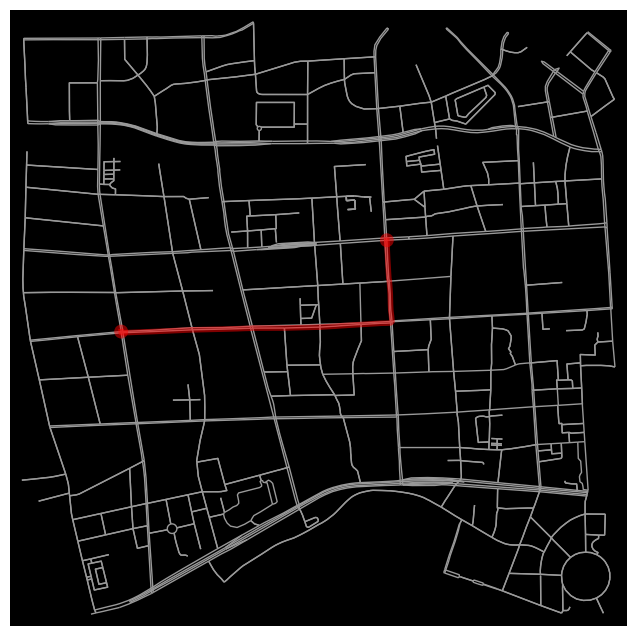

In [26]:
import networkx as nx

# Specify the start and end nodes
start_node = 332556593
end_node = 262910008

# Generate a BFS tree from the start node
bfs_tree = nx.bfs_tree(graph, source=start_node)

# Traverse the BFS tree to get the route from the start node to the end node
route = [end_node]
while route[-1] != start_node:
    route.append(list(bfs_tree.predecessors(route[-1]))[0])
route = route[::-1]  # reverse the route to start from the start node

# Plot the route
fig, ax = ox.plot_graph_route(graph, route, route_linewidth=4, node_size=0, bgcolor='k')

from optalgotools import routing

routing.draw_route(graph, route)



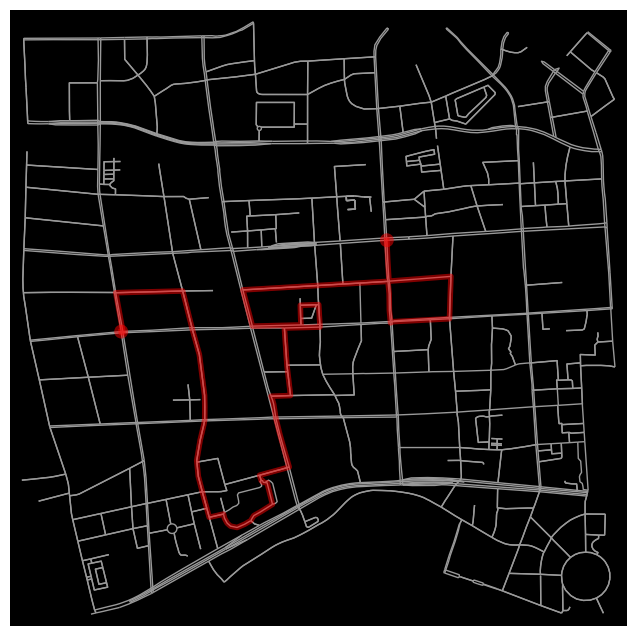

In [27]:

# Specify the start and end nodes
start_node = 332556593
end_node = 262910008

# Get the predecessors of each node in the DFS traversal
dfs_predecessors = nx.dfs_predecessors(graph, source=start_node)

# Traverse the predecessors to get the route from the start node to the end node
route = [end_node]
while route[-1] != start_node:
    route.append(dfs_predecessors[route[-1]])
route = route[::-1]  # reverse the route to start from the start node

# Plot the route
fig, ax = ox.plot_graph_route(graph, route, route_linewidth=4, node_size=0, bgcolor='k')

routing.draw_route(graph, route)


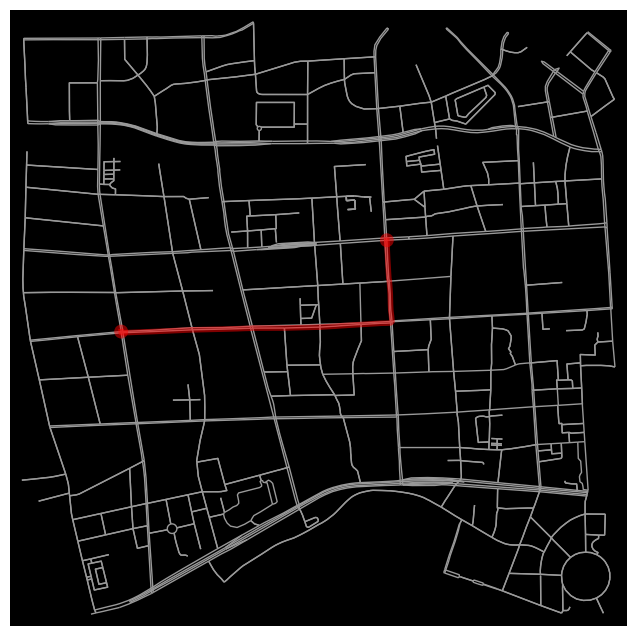

In [28]:

# Find the shortest path using Dijkstra's algorithm
route = nx.shortest_path(graph, source=start_node, target=end_node, method='dijkstra')

# Plot the route
fig, ax = ox.plot_graph_route(graph, route, route_linewidth=4, node_size=0, bgcolor='k')

routing.draw_route(graph, route)

Error calculating cost between nodes 262910008 and 332556593.
Error calculating cost between nodes 269967682 and 33992579.
Error calculating cost between nodes 33992579 and 4157887123.
Error calculating cost between nodes 269967683 and 4157887119.
Error calculating cost between nodes 262910008 and 332556593.
Error calculating cost between nodes 271682804 and 1038253696.
Error calculating cost between nodes 1038253696 and 9528742117.
Error calculating cost between nodes 1667038355 and 271683593.
Error calculating cost between nodes 271683593 and 31319856.
Error calculating cost between nodes 269967682 and 33992579.
Error calculating cost between nodes 33992579 and 4157887123.
Error calculating cost between nodes 269967683 and 4157887119.
Error calculating cost between nodes 262910008 and 332556593.
Error calculating cost between nodes 271682804 and 1038253696.
Error calculating cost between nodes 1038253696 and 9528742117.
Error calculating cost between nodes 3403595920 and 33720419.
Er

AttributeError: 'NoneType' object has no attribute 'values'

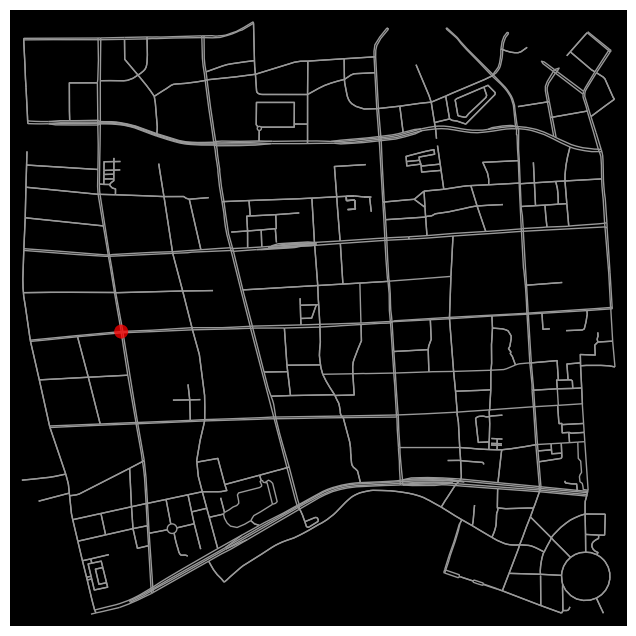

In [29]:
# Traverse the predecessors to get the route from the start node to the end node
route = [end_node]
while route[-1] != start_node:
    route.append(dfs_predecessors[route[-1]])
route = route[::-1]  # reverse the route to start from the start node

# fig, ax = ox.plot_graph_route(graph, route, route_linewidth=4, node_size=0, bgcolor='k')

import random
import math

def cost(route):
    total_cost = 0
    for u, v in zip(route[:-1], route[1:]):
        try:
            total_cost += graph[u][v][0]['length']
        except KeyError:
            print(f"Error calculating cost between nodes {u} and {v}.")
    return total_cost


def get_neighbour(route):
    idx1, idx2 = random.sample(range(1, len(route)-1), 2)
    new_route = route[:]
    new_route[idx1], new_route[idx2] = new_route[idx2], new_route[idx1]
    return new_route

def simulated_annealing(route, T=1000, alpha=0.995, stopping_T=0.1):
    current_route = route[:]
    current_cost = cost(current_route)
    best_route = route[:]
    best_cost = current_cost
    
    while T > stopping_T:
        neighbour = get_neighbour(current_route)
        neighbour_cost = cost(neighbour)
        
        if neighbour_cost < best_cost:
            best_cost = neighbour_cost
            best_route = neighbour[:]
        
        if neighbour_cost < current_cost or random.random() < math.exp((current_cost - neighbour_cost) / T):
            current_route = neighbour[:]
            current_cost = neighbour_cost
        
        T *= alpha
    
    return best_route

nodes_to_visit = route  # replace with the list of nodes you want to visit
initial_route = nodes_to_visit + [start_node]

optimized_route = simulated_annealing(initial_route)

# Plot the optimized route
fig, ax = ox.plot_graph_route(graph, optimized_route, route_linewidth=4, node_size=0, bgcolor='k')